<a id = 1> </a>
# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a id = 2> </a>
# Load the Data

In [3]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


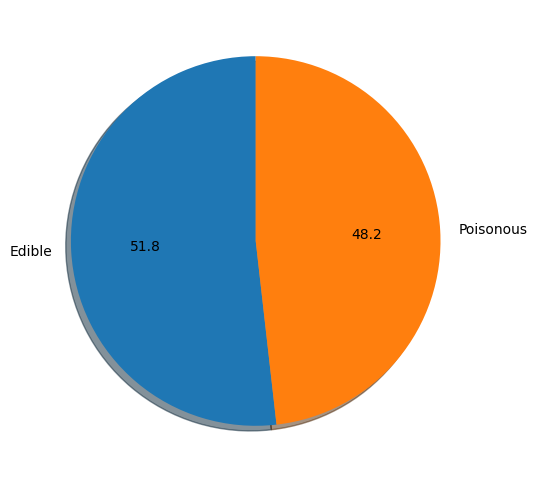

In [4]:
plt.figure(figsize = (6,6))
plt.pie(df['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = True)
plt.show()

## Set dependent and independent variable

In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

## Check if there is null value.

In [6]:
df.notnull().all()

class                       True
cap-shape                   True
cap-surface                 True
cap-color                   True
bruises                     True
odor                        True
gill-attachment             True
gill-spacing                True
gill-size                   True
gill-color                  True
stalk-shape                 True
stalk-root                  True
stalk-surface-above-ring    True
stalk-surface-below-ring    True
stalk-color-above-ring      True
stalk-color-below-ring      True
veil-type                   True
veil-color                  True
ring-number                 True
ring-type                   True
spore-print-color           True
population                  True
habitat                     True
dtype: bool

As you can see above, there is no null value in our dataset.

### Encode Independent Variable

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.iloc[:, 1:].apply(le.fit_transform).values

### Encode Dependent Variable

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = np.array(le.fit_transform(y))
y.reshape(len(y), 1)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

<a id = 5> </a>
# Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<a id = 6> </a>
# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score
accuracy_nb = accuracy_score(y_test, y_pred)
print('Accuracy is:', accuracy_nb)

Accuracy is: 0.9218461538461539


### Confusion Matrix

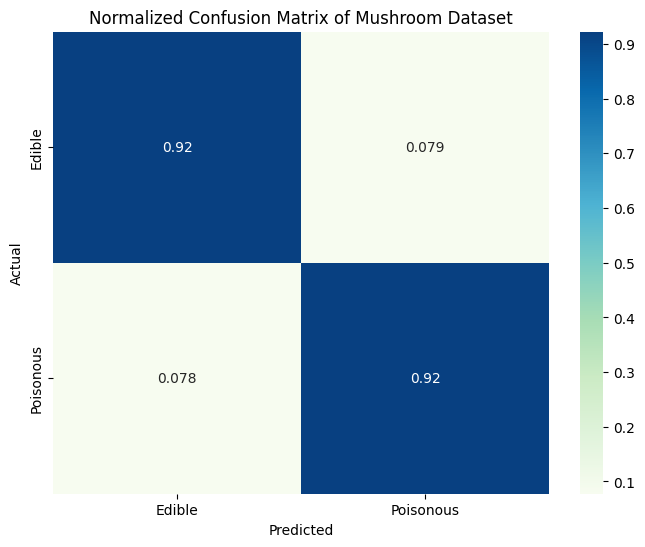

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='GnBu', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Normalized Confusion Matrix of Mushroom Dataset')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

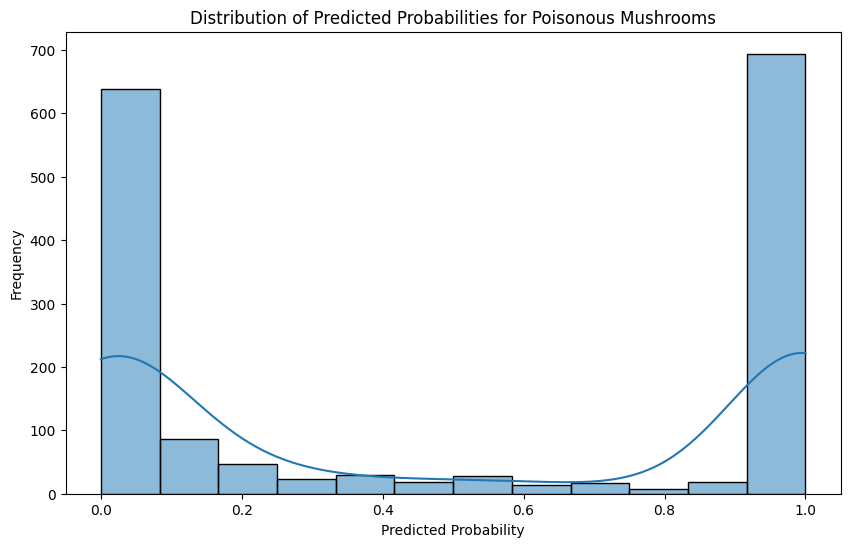

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(y_prob[:, 1], kde=True)
plt.title('Distribution of Predicted Probabilities for Poisonous Mushrooms')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()